In [5]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils import plot_vaccine_by_state, baselineModel

%reload_ext autoreload

def disparity(N,r,style=1):
    assert(style==1 or style==2)
    out = 0
    coef = 2/(N*(N-1))
    for i in range(N):
        for j in range(i+1,N):
            if style==1:
                out += np.abs(r[i]-r[j])
            elif style==2:
                out += (r[i]-r[j])**2
    return coef*out

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
df = pd.read_csv("Dataset/data_complete.csv")

N = len(df) # num. of locations
M = np.sum(df["Total_1"]) # total unit amount of resources
lam = 0.125
p1 = (1-0.05*lam)*np.ones(N)
p0 = (1-lam)*np.ones(N)
c = np.log(np.array(df["Distance"]))
o = np.zeros(N)
n = np.array(df["Population"])
y_raw = np.array(df["Total_1"])

r_raw = (o+y_raw)/(n*lam)
alpha_raw = np.min(r_raw)

beta_0=2*1e-2; gamma_0=3*1e-4; style=1; rou_0=2.5*1e5; # baseline param. fixed
zeta = beta_0/gamma_0
print(zeta)

66.66666666666666


Start with:
$$\max_y \, \frac{\beta_0}{\gamma_0}\Delta^\top y - \frac{\rho_0}{\beta_0}D(y) - c^\top y$$
Let $\zeta_0 = \frac{\beta_0}{\gamma_0} \approx 66.7$, fix $\rho_0$. 
<br>
Then we have $\zeta$ sweeping from $1$ to $100$, at stepsize $1/3$; for each value of $\zeta$, solve
$$\max_y \, \zeta\Delta^\top y$$ 
and 
$$\max_y \,  - c^\top y$$

In [37]:
ratios = np.linspace(1,100,300) # ratios[66*3] closest to ratio (diff < 0.2)

rou_0 = rou_0/gamma_0


def g(y,
      delta=delta,N=N,o=o,n=n,c=c,lam=lam,style=1):
    r = (o+y)/(n*lam)
    disp = disparity(N,r,style)
    return objective(0,0,-1,delta,disp,c,y)
def f(y,ratio,
      delta=delta,N=N,o=o,n=n,c=c,lam=lam,style=1):
    r = (o+y)/(n*lam)
    disp = disparity(N,r,style)
    return objective(ratio,0,0,delta,disp,c,y)


def objective(beta,rou,gamma,delta,disp,c,y):
    return (beta*delta - gamma*c)@y - rou*disp 


#### Pareto Frontier:
$$ P(y) = \{y \in \mathcal{D}\,:\,\nexists y' \in \mathcal{D} \text{ s.t. }y'\succ y, y'\neq y \}$$
<br>
- $\mathcal{D} = \{y\in\mathbb{R}^N\,:\, y\text{ satisfies the constraints in BL-}L_1\}$
- $f(y) = \Delta^\top y,\quad g(y) = c^\top y$
- For $y',y\in \mathcal{D}$, Define $y'\succ y$ as: 
$$f(y')\geq f(y)\text{ and } g(y') \leq g(y), \text{ at least one strict inequality}$$

In [38]:
points = []


for key in ratios:
    y_key,_ = baselineModel(N,M,c,o,n,lam,p1,p0,alpha_raw,
                            key,rou_0,1,
                            d_style=style,name=None,pout=False)
    g_key = g(y_key)
    f_key = f(y_key,key)
    points.append((f_key,g_key))

points.sort(reverse=True) #sort f_values in descending order


Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set paramete

Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set paramete

In [56]:
# remove the dominated points

remains = points.copy()
n_max = len(points)
n_rem = set()
for i in range(n_max):
    p = points[i]
    for j in range(n_max):
        if j == i or j in n_rem:
            continue
       
        if int(points[j][0])>int(p[0]) and int(points[j][1])<=int(p[1]):
            if p in remains:
            #point_j dominates p
                remains.remove(p)
            n_rem.add(i)
        elif int(points[j][0])>=int(p[0]) and int(points[j][1])<int(p[1]):
            if p in remains:
            #point_j dominates p
                remains.remove(p)
            n_rem.add(i)

print(len(remains))

15


In [65]:
y_BL,_ = baselineModel(N,M,c,o,n,lam,p1,p0,alpha_raw,
                       ratio_0,rou_0,1,
                       d_style=style,name=None,pout=False)

Set parameter LogToConsole to value 0


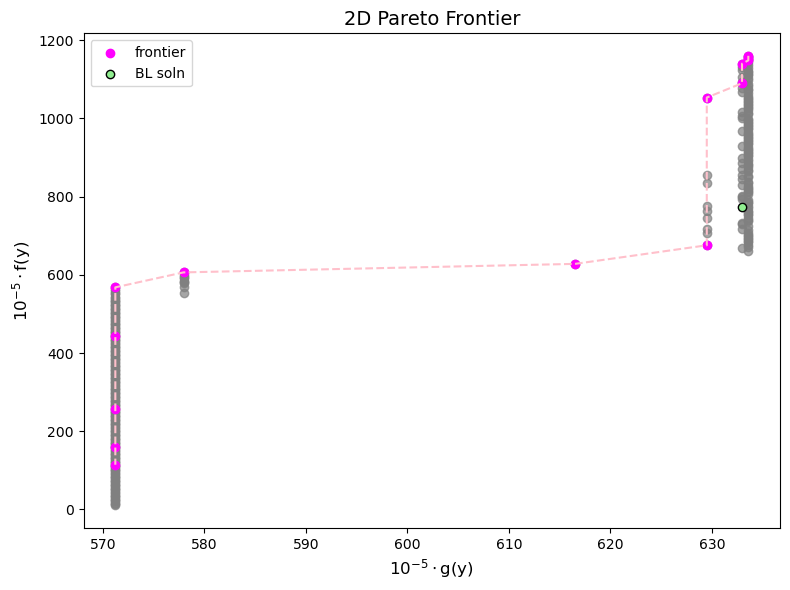

In [86]:
''''''
# Pareto Frontier plot
''''''
g_key_0 = g(y_BL)
f_key_0 = f(y_BL,ratio_0)

plt.figure(figsize=(8, 6))
plt.scatter([g/1e5 for (f,g) in points],[f/1e5 for (f,g) in points],color="grey",alpha=0.7)
plt.scatter([g/1e5 for (f,g) in remains],[f/1e5 for (f,g) in remains],color="magenta",label="frontier")
plt.plot([g/1e5 for (f,g) in remains],[f/1e5 for (f,g) in remains],color="pink",linestyle="--")
plt.scatter(g_key_0/1e5, f_key_0/1e5,color="lightgreen",edgecolor="black",label="BL soln")
plt.xlabel("$10^{-5}\cdot$g(y)",fontsize=12)
plt.ylabel("$10^{-5}\cdot$f(y)",fontsize=12)
plt.title("2D Pareto Frontier",fontsize=14)
plt.tight_layout()
plt.legend()
plt.show()